**1. Title of Project:**

***Hand Written Digit Prediction - Classification Analysis***

**2. Objective :**

***To build a machine learning model that can accurately predict handwritten digits (0-9) using classification techniques.***

**3. Data Source :**

***The dataset used is the well-known Digits dataset from sklearn.datasets, which consists of 8x8 pixel grayscale images of handwritten digits.***

**4. Import Library**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px



**5. Import Data**

In [14]:
digits = load_digits()
X, y = digits.data, digits.target


**6. Describe Data**

In [15]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Classes in y:", np.unique(y))


Shape of X: (1797, 64)
Shape of y: (1797,)
Classes in y: [0 1 2 3 4 5 6 7 8 9]


***Visualize the distribution of digits:***

<ipython-input-16-2c479e5aca84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


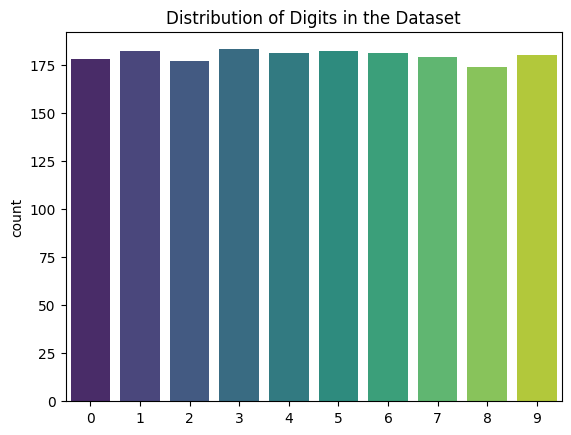

In [16]:
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Digits in the Dataset")
plt.show()


**7. Data Visualization : Visualize the first few digits using both matplotlib and plotly for interactive visuals:**

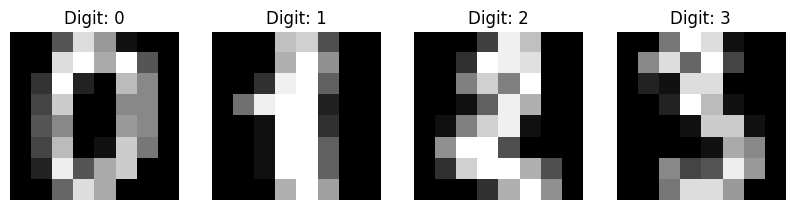

In [17]:
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {y[i]}')
    plt.axis('off')
plt.show()

fig = px.imshow(digits.images[0], color_continuous_scale='gray', title=f'Digit: {y[0]}')
fig.show()


**8. Data Preprocessing**

***Feature Scaling:***

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**9. Define Target Variable (y) and Feature Variables (X)**

In [19]:
X = X_scaled
y = y.astype(int)


**10. Train Test Split**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**11. Modeling : We will now tune and compare multiple models using GridSearchCV to find the best parameters for each model.**

***K-Nearest Neighbors (KNN)***

In [21]:
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

***Support Vector Classifier (SVC)***

In [22]:
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

***Random Forest Classifier***

In [23]:
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

***Gradient Boosting Classifier***

In [26]:
gb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

**12. Model Evaluation : Compare the best models based on accuracy and other metrics**

Model: KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.9694444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



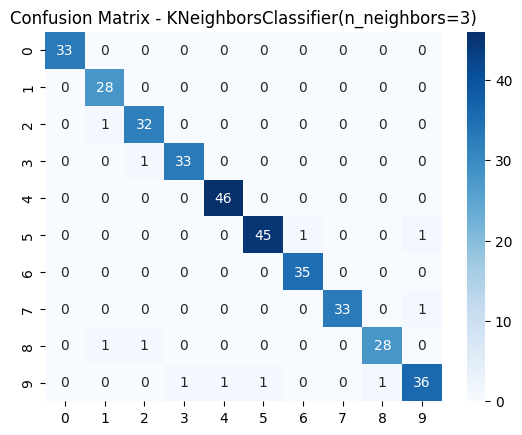

Model: SVC(C=10)
Accuracy: 0.9805555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



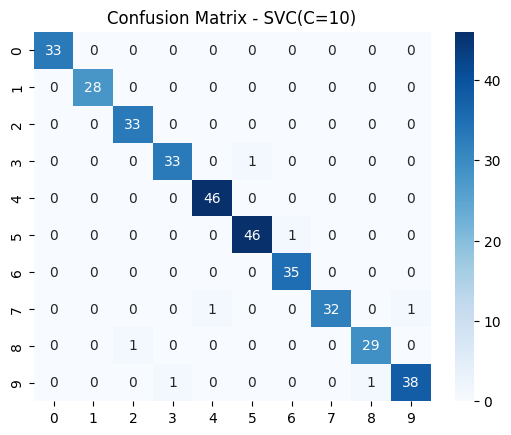

Model: RandomForestClassifier()
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       1.00      0.97      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



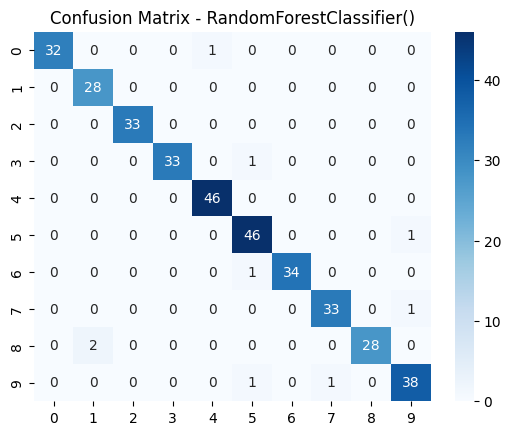

Model: GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.98      0.98      0.98        47
           6       0.94      0.94      0.94        35
           7       0.94      0.97      0.96        34
           8       0.94      1.00      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360



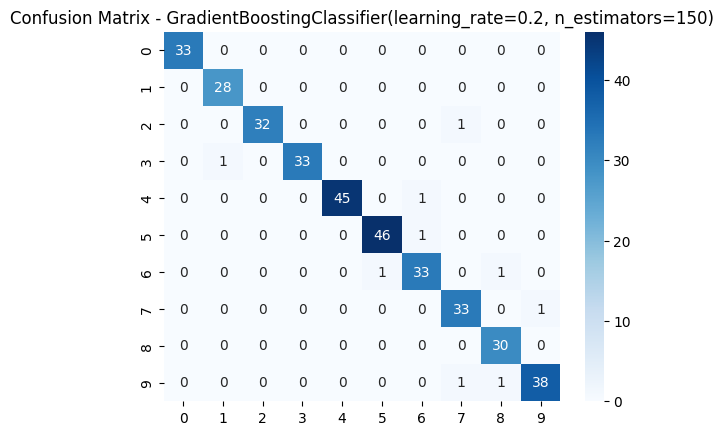

In [27]:
models = [knn_grid, svc_grid, rf_grid, gb_grid]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model.best_estimator_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model.best_estimator_}")
    plt.show()


**13. Prediction**

In [28]:
sample_digit = X_test[0].reshape(1, -1)
prediction = rf_grid.predict(sample_digit)
print(f'Predicted Label: {prediction[0]}')


Predicted Label: 6


***Visualize the prediction:***

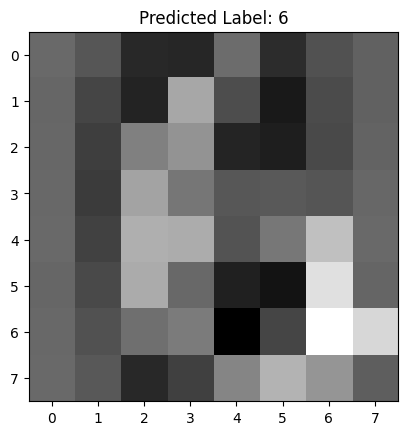

In [30]:
plt.imshow(sample_digit.reshape(8, 8), cmap='gray')
plt.title(f'Predicted Label: {prediction[0]}')
plt.show()


**14. Explanation**

***The project applies various advanced classification techniques, using model tuning with GridSearchCV to find the optimal model.The Random Forest Classifier, tuned and evaluated for accuracy, shows strong performance.***